In [1]:
# for crawling
from bs4 import BeautifulSoup
import requests
# for text preprocessing
import re
from konlpy.tag import Twitter
from soylemma import Lemmatizer
# for visualize
import matplotlib.pyplot as plt
import seaborn as sns
# for network
import networkx as nx
# ETC
import pandas as pd
from pprint import pprint
from collections import Counter
import warnings

warnings.filterwarnings(action='ignore')

# Naver News API 용 파라미터

In [2]:
client_id = 'fS78qs60r_g5Qyvb3q5u'
client_pw = 'kat_9S0LLk'

keyword = '쿠팡'
encode_type = 'json'
max_display = 100
sort = 'date'
start = 1

url = f"https://openapi.naver.com/v1/search/news.{encode_type}?query={keyword}&display={str(int(max_display))}&start={str(int(start))}&sort={sort}"
headers = {'X-Naver-Client-Id' : client_id,
           'X-Naver-Client-Secret':client_pw
           }

# API를 통한 crawling

In [3]:
request = requests.get(url, headers=headers)

In [4]:
# 제대로 통신되었는지 확인
# 200이 나오면 정상
print(request)

<Response [200]>


In [5]:
request.json()

{'lastBuildDate': 'Tue, 03 Nov 2020 17:01:32 +0900',
 'total': 129023,
 'start': 1,
 'display': 100,
 'items': [{'title': "아이배냇, '저지 우유'로 우유시장 본격 도전장",
   'originallink': 'http://moneys.mt.co.kr/news/mwView.php?no=2020110316328053055',
   'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=417&aid=0000613986',
   'description': '이후 지난달 <b>쿠팡</b>에 이어 이달 마켓컬리에 저지우유를 론칭하며 소비자와의 접점 확대에 나섰다.\xa0이에 따라 소비자들은 아이배냇몰·배냇밀몰·마켓컬리·<b>쿠팡</b>을 통해 저지우유를 맛볼 수 있게 됐다. 저지우유는\xa0일반... ',
   'pubDate': 'Tue, 03 Nov 2020 16:56:00 +0900'},
  {'title': '박화진 고용부 차관 “배달종사자 사고예방·업무환경 개선하겠다”',
   'originallink': 'http://news.kmib.co.kr/article/view.asp?arcid=0015178706&code=61121111&cp=nv',
   'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=005&aid=0001377264',
   'description': '현장에는 <b>쿠팡</b>이츠, 배민라이더스, 딜리버리히어로코리아, 바로고, 브릉 등 업계 임원과 배달종사자들이 참석했다. 박 차관은 배달종사자가 상시 사용하는 배달 앱과 연계해 유용한 정보를 안내하는 ‘정보공유... ',
   'pubDate': 'Tue, 03 Nov 2020 16:54:00 +0900'},
  {'title': 

In [6]:
crawling_table = pd.DataFrame(request.json()['items'])
crawling_table.head()

,title,originallink,link,description,pubDate
0,"아이배냇, '저지 우유'로 우유시장 본격 도전장",http://moneys.mt.co.kr/news/mwView.php?no=2020...,https://news.naver.com/main/read.nhn?mode=LSD&...,이후 지난달 <b>쿠팡</b>에 이어 이달 마켓컬리에 저지우유를 론칭하며 소비자와의...,"Tue, 03 Nov 2020 16:56:00 +0900"
1,박화진 고용부 차관 “배달종사자 사고예방·업무환경 개선하겠다”,http://news.kmib.co.kr/article/view.asp?arcid=...,https://news.naver.com/main/read.nhn?mode=LSD&...,"현장에는 <b>쿠팡</b>이츠, 배민라이더스, 딜리버리히어로코리아, 바로고, 브릉 ...","Tue, 03 Nov 2020 16:54:00 +0900"
2,배달노동자들 &quot;내 사장은 인공지능(AI) 알고리즘&quot;,http://news.khan.co.kr/kh_news/khan_art_view.h...,https://news.naver.com/main/read.nhn?mode=LSD&...,"<b>쿠팡</b>이츠, 배달의민족 라이더(배달노동자)들이 최근 도입된 인공지능(AI...","Tue, 03 Nov 2020 16:54:00 +0900"
3,"&quot;토요일 택배, 기사들 휴무에 양보하면 안 되나요?&quot;",http://www.ohmynews.com/NWS_Web/View/at_pg.asp...,https://news.naver.com/main/read.nhn?mode=LSD&...,"'주5일제' 내건 <b>쿠팡</b>, 변수 될까? ▲ 민주노총 대구본부와 택배노동...","Tue, 03 Nov 2020 16:52:00 +0900"
4,온라인 대한민국 식품대전 성료,http://www.jndn.com/article.php?aid=1604389752...,http://www.jndn.com/article.php?aid=1604389752...,"또한 우체국쇼핑몰, 오아시스마켓, <b>쿠팡</b> 등 주요 온라인 유통채널 5개소...","Tue, 03 Nov 2020 16:52:00 +0900"


# 정규표현식으로 불필요한 문자 제거 

In [7]:
def clean_html(x):
    x = re.sub("\&\w*\;","",x)
    x = re.sub("<.*?>","",x)
    return x

In [8]:
crawling_table['title'] = crawling_table['title'].apply(lambda x: clean_html(x))
crawling_table['description'] = crawling_table['description'].apply(lambda x: clean_html(x))

In [9]:
crawling_table

,title,originallink,link,description,pubDate
0,"아이배냇, '저지 우유'로 우유시장 본격 도전장",http://moneys.mt.co.kr/news/mwView.php?no=2020...,https://news.naver.com/main/read.nhn?mode=LSD&...,이후 지난달 쿠팡에 이어 이달 마켓컬리에 저지우유를 론칭하며 소비자와의 접점 확대에...,"Tue, 03 Nov 2020 16:56:00 +0900"
1,박화진 고용부 차관 “배달종사자 사고예방·업무환경 개선하겠다”,http://news.kmib.co.kr/article/view.asp?arcid=...,https://news.naver.com/main/read.nhn?mode=LSD&...,"현장에는 쿠팡이츠, 배민라이더스, 딜리버리히어로코리아, 바로고, 브릉 등 업계 임원...","Tue, 03 Nov 2020 16:54:00 +0900"
2,배달노동자들 내 사장은 인공지능(AI) 알고리즘,http://news.khan.co.kr/kh_news/khan_art_view.h...,https://news.naver.com/main/read.nhn?mode=LSD&...,"쿠팡이츠, 배달의민족 라이더(배달노동자)들이 최근 도입된 인공지능(AI)에 기반한 ...","Tue, 03 Nov 2020 16:54:00 +0900"
3,"토요일 택배, 기사들 휴무에 양보하면 안 되나요?",http://www.ohmynews.com/NWS_Web/View/at_pg.asp...,https://news.naver.com/main/read.nhn?mode=LSD&...,"'주5일제' 내건 쿠팡, 변수 될까? ▲ 민주노총 대구본부와 택배노동자 과로사 대...","Tue, 03 Nov 2020 16:52:00 +0900"
4,온라인 대한민국 식품대전 성료,http://www.jndn.com/article.php?aid=1604389752...,http://www.jndn.com/article.php?aid=1604389752...,"또한 우체국쇼핑몰, 오아시스마켓, 쿠팡 등 주요 온라인 유통채널 5개소의 판촉기획전...","Tue, 03 Nov 2020 16:52:00 +0900"
...,...,...,...,...,...
95,"비브, 세포라 ‘Next K-BEAUTY’ 팝업스토어 참여",http://www.lawissue.co.kr/view.php?ud=20201103...,http://www.lawissue.co.kr/view.php?ud=20201103...,‘Next K-BEAUTY’ 팝업스토어에 관련된 보다 자세한 내용은 비브 인스타그램...,"Tue, 03 Nov 2020 11:06:00 +0900"
96,"[카운트머니] 이마트, 점포 팔아 명맥 이어가는 속사정은? (feat. 2020 반...",https://cnbc.sbs.co.kr/article_hub/10001001210...,https://news.naver.com/main/read.nhn?mode=LSD&...,마켓컬리와 쿠팡은 커졌는데요. 이마트도 SSG닷컴이 있긴 하지만 이마트 전체 매출로...,"Tue, 03 Nov 2020 11:05:00 +0900"
97,"이삭토스트, 배달의민족 주문 시 3,000원 할인",http://www.e2news.com/news/articleView.html?id...,http://www.e2news.com/news/articleView.html?id...,이삭토스트는 최근 비대면 소비 방식이 하나의 소비패턴으로 정착되면서 다양한 플랫폼에...,"Tue, 03 Nov 2020 11:05:00 +0900"
98,제주에도 쿠팡 효과... 제주지역 영세 소상공인 상반기 매출 171% 성장,http://www.seconomy.kr/view.php?ud=20201103105...,http://www.seconomy.kr/view.php?ud=20201103105...,쿠팡과 제주도의 협력으로 올 상반기 쿠팡과 거래하는 제주 지역 영세 소상공인이 전년...,"Tue, 03 Nov 2020 11:01:00 +0900"


# Text에서 중요한 keyword만 추출

**해당 keyword는 network의 node**

In [10]:
def text_preprocessing(text) :
    twit = Twitter()
    words = twit.pos(text)
    
    noun_list = []
    verb_list = []
    for word in words :
        if word[1] == 'Noun' :
            noun_list.append(word[0])
        elif  word[1] == 'Verb' :
            verb_list.append(word)
    
    lemm = Lemmatizer()
    verb_list = [lemm.lemmatize(word[0]) for word in verb_list]
    
    keyword = noun_list + verb_list
    
    return noun_list

In [11]:
crawling_table['noun'] = [text_preprocessing(sent) for sent in crawling_table['description']]

In [12]:
total_noun = []
for ls in crawling_table['noun'] :
    total_noun = total_noun + ls

In [13]:
word_count = pd.DataFrame({'word' : list(Counter(total_noun).keys()), 'freq' : list(Counter(total_noun).values())})
word_count = word_count.sort_values(by=['freq'], ascending=False, ignore_index=True)

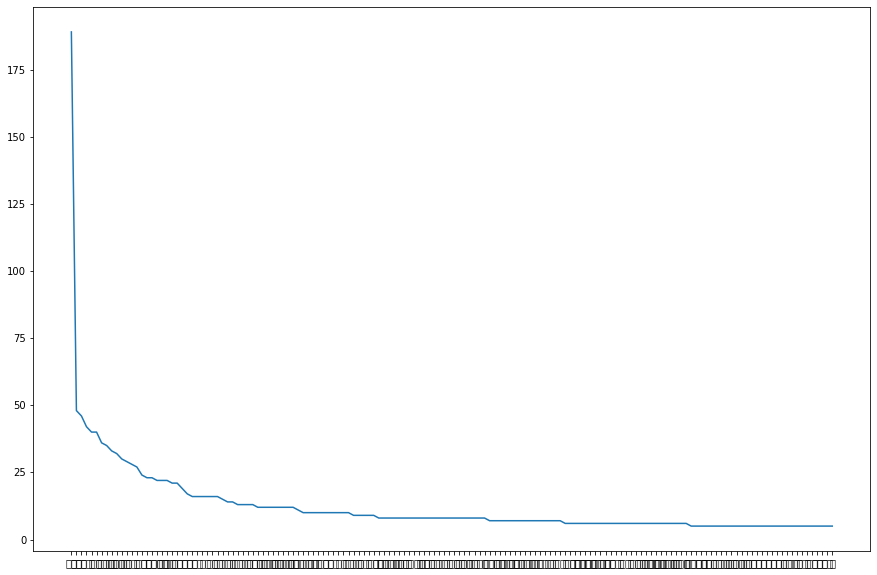

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(word_count[word_count['freq'] >=5]['word'], word_count[word_count['freq'] >=5]['freq'])

In [15]:
high_freq_word = word_count[word_count['freq']>=5]
high_freq_word

,word,freq
0,쿠팡,189
1,제주,48
2,지역,46
3,영세,42
4,등,40
...,...,...
147,단체,5
148,협약,5
149,아이,5
150,종사,5


# Make network

In [16]:
def make_edge(data) :
    edge = []
    for idx in range(len(data)) :
        for after_word in data[idx+1:] :
            edge.append((data[idx], after_word))
    return edge

In [17]:
edge_list = []
for nodes in crawling_table['noun'] :
    edge_list.append(make_edge(nodes))

crawling_table['edge'] = edge_list

# Draw Network

In [18]:
G = nx.Graph()
for edge in crawling_table['edge'] :
    G.add_edges_from(edge)

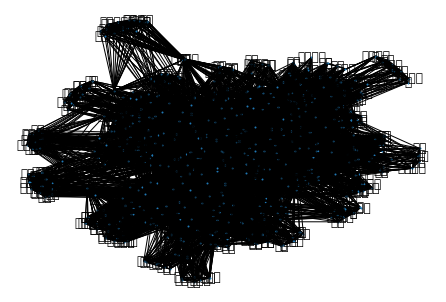

In [19]:
nx.draw(G, with_labels=True, node_size=1)

In [20]:
nx.write_gexf(G, 'coupang.gexf')